# Analise de Microregioes

## Imports

In [1]:
import geopandas as gpd
import pandas as pd

## Carregando os dados

In [2]:
df_micro = gpd.read_file("dados/limites/MA_Microrregioes_2022.zip")
df_micro.set_index("CD_MICRO", inplace=True)
df_micro.head(3)

NM_MICRO SIGLA_UF  AREA_KM2  \
CD_MICRO                                                      
21001       Litoral Ocidental Maranhense       MA  8547.145   
21002     Aglomeração Urbana de São Luís       MA   969.832   
21003                            Rosário       MA  6007.590   

                                                   geometry  
CD_MICRO                                                     
21001     MULTIPOLYGON (((-44.71062 -2.62729, -44.71043 ...  
21002     MULTIPOLYGON (((-44.41227 -2.79830, -44.41246 ...  
21003     MULTIPOLYGON (((-44.07882 -2.74381, -44.07757 ...

In [3]:
df_micro_desmatamento = gpd.read_file("dados/desmatamento/microregiao_ma_cerrado_desmatamento.zip")
df_micro_desmatamento.set_index("CD_MICRO", inplace=True)
df_micro_desmatamento.head(3)

inserted_a       area_ha      category_n  porc_cerra source  \
CD_MICRO                                                                
21011     2020-02-07  1.984568e+08  Bioma Refinado    0.915295   IBGE   
21013     2020-02-07  1.984568e+08  Bioma Refinado    1.000845   IBGE   
21017     2020-02-07  1.984568e+08  Bioma Refinado    1.000009   IBGE   

          version    area_cerra                   NM_MICRO  updated_at  \
CD_MICRO                                                                 
21011           1  33700.677928       Alto Mearim e Graja?  2020-02-07   
21013           1   6039.736701  Baixo Parna?ba Maranhense  2020-02-07   
21017           1  15340.102814                     Caxias  2020-02-07   

           AREA_KM2 SIGLA_UF     d01-23     name      d2000     id  \
CD_MICRO                                                             
21011     36819.486       MA  23.178312  CERRADO  22.969564  18415   
21013      6034.638       MA  25.398299  CERRADO   9.184563  18415   
21017     15339.961       MA  32.163859  CERRADO  10.382197  18415   

               category                                           geometry  
CD_MICRO                                                                    
21011     refined_biome  MULTIPOLYGON (((-46.79478 -5.87322, -46.79471 ...  
21013     refined_biome  POLYGON ((-43.16301 -3.43314, -43.16300 -3.432...  
21017     refined_biome  POLYGON ((-44.07660 -5.83684, -44.07614 -5.836...

* ao exportar no google earth engine, os nomes com acentos ficaram errados

In [4]:
df_micro_desmatamento["NM_MICRO"] = df_micro["NM_MICRO"]
df_micro_desmatamento

inserted_a       area_ha      category_n  porc_cerra source  \
CD_MICRO                                                                
21011     2020-02-07  1.984568e+08  Bioma Refinado    0.915295   IBGE   
21013     2020-02-07  1.984568e+08  Bioma Refinado    1.000845   IBGE   
21017     2020-02-07  1.984568e+08  Bioma Refinado    1.000009   IBGE   
21021     2020-02-07  1.984568e+08  Bioma Refinado    0.999321   IBGE   
21018     2020-02-07  1.984568e+08  Bioma Refinado    0.999590   IBGE   
21014     2020-02-07  1.984568e+08  Bioma Refinado    1.000162   IBGE   
21015     2020-02-07  1.984568e+08  Bioma Refinado    0.999515   IBGE   
21016     2020-02-07  1.984568e+08  Bioma Refinado    1.000125   IBGE   
21020     2020-02-07  1.984568e+08  Bioma Refinado    0.999754   IBGE   
21006     2020-02-07  1.984568e+08  Bioma Refinado    0.935117   IBGE   
21004     2020-02-07  1.984568e+08  Bioma Refinado    0.968079   IBGE   
21010     2020-02-07  1.984568e+08  Bioma Refinado    0.625860   IBGE   
21019     2020-02-07  1.984568e+08  Bioma Refinado    1.000586   IBGE   
21012     2020-02-07  1.984568e+08  Bioma Refinado    0.999390   IBGE   

          version    area_cerra                    NM_MICRO  updated_at  \
CD_MICRO                                                                  
21011           1  33700.677928        Alto Mearim e Grajaú  2020-02-07   
21013           1   6039.736701   Baixo Parnaíba Maranhense  2020-02-07   
21017           1  15340.102814                      Caxias  2020-02-07   
21021           1  16961.316708    Chapadas das Mangabeiras  2020-02-07   
21018           1  25011.300477  Chapadas do Alto Itapecuru  2020-02-07   
21014           1  10799.152883                  Chapadinha  2020-02-07   
21015           1   9914.815626                        Codó  2020-02-07   
21016           1   3608.482943                 Coelho Neto  2020-02-07   
21020           1  36657.324079            Gerais de Balsas  2020-02-07   
21006           1   6609.047340             Itapecuru Mirim  2020-02-07   
21004           1   9900.023024         Lençóis Maranhenses  2020-02-07   
21010           1   6886.510594                Médio Mearim  2020-02-07   
21019           1  14062.460016                Porto Franco  2020-02-07   
21012           1   6543.504516            Presidente Dutra  2020-02-07   

           AREA_KM2 SIGLA_UF     d01-23     name      d2000     id  \
CD_MICRO                                                             
21011     36819.486       MA  23.178312  CERRADO  22.969564  18415   
21013      6034.638       MA  25.398299  CERRADO   9.184563  18415   
21017     15339.961       MA  32.163859  CERRADO  10.382197  18415   
21021     16972.844       MA  21.123042  CERRADO   9.242601  18415   
21018     25021.559       MA  18.649766  CERRADO   5.558591  18415   
21014     10797.402       MA  27.840742  CERRADO   4.239209  18415   
21015      9919.623       MA  25.715124  CERRADO  36.283000  18415   
21016      3608.032       MA  27.220870  CERRADO   6.728744  18415   
21020     36666.357       MA  21.833064  CERRADO   9.646512  18415   
21006      7067.616       MA  25.317416  CERRADO  19.379355  18415   
21004     10226.463       MA  11.250535  CERRADO   2.886642  18415   
21010     11003.275       MA   4.130432  CERRADO  92.563754  18415   
21019     14054.223       MA  24.873774  CERRADO  18.327801  18415   
21012      6547.496       MA  37.403125  CERRADO  44.110667  18415   

               category                                           geometry  
CD_MICRO                                                                    
21011     refined_biome  MULTIPOLYGON (((-46.79478 -5.87322, -46.79471 ...  
21013     refined_biome  POLYGON ((-43.16301 -3.43314, -43.16300 -3.432...  
21017     refined_biome  POLYGON ((-44.07660 -5.83684, -44.07614 -5.836...  
21021     refined_biome  POLYGON ((-46.45104 -7.06645, -46.41764 -7.017...  
21018     refined_biome  POLYGON ((-45.94808 -6.67402, -4

In [5]:
df_micro_desmatamento.sort_values("porc_cerra").head(3)

inserted_a       area_ha      category_n  porc_cerra source  \
CD_MICRO                                                                
21010     2020-02-07  1.984568e+08  Bioma Refinado    0.625860   IBGE   
21011     2020-02-07  1.984568e+08  Bioma Refinado    0.915295   IBGE   
21006     2020-02-07  1.984568e+08  Bioma Refinado    0.935117   IBGE   

          version    area_cerra              NM_MICRO  updated_at   AREA_KM2  \
CD_MICRO                                                                       
21010           1   6886.510594          Médio Mearim  2020-02-07  11003.275   
21011           1  33700.677928  Alto Mearim e Grajaú  2020-02-07  36819.486   
21006           1   6609.047340       Itapecuru Mirim  2020-02-07   7067.616   

         SIGLA_UF     d01-23     name      d2000     id       category  \
CD_MICRO                                                                 
21010          MA   4.130432  CERRADO  92.563754  18415  refined_biome   
21011          MA  23.178312  CERRADO  22.969564  18415  refined_biome   
21006          MA  25.317416  CERRADO  19.379355  18415  refined_biome   

                                                   geometry  
CD_MICRO                                                     
21010     POLYGON ((-45.34916 -5.08324, -45.34846 -5.080...  
21011     MULTIPOLYGON (((-46.79478 -5.87322, -46.79471 ...  
21006     POLYGON ((-44.61704 -3.59775, -44.61631 -3.597...

In [6]:
df_micro_desmatamento["d00-23"] = df_micro_desmatamento["d2000"] + df_micro_desmatamento["d01-23"]

In [7]:
df_micro_desmatamento.shape

(14, 18)

In [8]:
df_micro_desmatamento.head(2)

inserted_a       area_ha      category_n  porc_cerra source  \
CD_MICRO                                                                
21011     2020-02-07  1.984568e+08  Bioma Refinado    0.915295   IBGE   
21013     2020-02-07  1.984568e+08  Bioma Refinado    1.000845   IBGE   

          version    area_cerra                   NM_MICRO  updated_at  \
CD_MICRO                                                                 
21011           1  33700.677928       Alto Mearim e Grajaú  2020-02-07   
21013           1   6039.736701  Baixo Parnaíba Maranhense  2020-02-07   

           AREA_KM2 SIGLA_UF     d01-23     name      d2000     id  \
CD_MICRO                                                             
21011     36819.486       MA  23.178312  CERRADO  22.969564  18415   
21013      6034.638       MA  25.398299  CERRADO   9.184563  18415   

               category                                           geometry  \
CD_MICRO                                                                     
21011     refined_biome  MULTIPOLYGON (((-46.79478 -5.87322, -46.79471 ...   
21013     refined_biome  POLYGON ((-43.16301 -3.43314, -43.16300 -3.432...   

             d00-23  
CD_MICRO             
21011     46.147876  
21013     34.582862

In [9]:
df_formatar = df_micro_desmatamento.sort_values("d01-23", ascending=False)[["NM_MICRO","area_cerra","d2000", "d00-23","d01-23"]].set_index("NM_MICRO")
df_formatar

area_cerra      d2000     d00-23     d01-23
NM_MICRO                                                                 
Presidente Dutra             6543.504516  44.110667  81.513792  37.403125
Caxias                      15340.102814  10.382197  42.546056  32.163859
Chapadinha                  10799.152883   4.239209  32.079951  27.840742
Coelho Neto                  3608.482943   6.728744  33.949615  27.220870
Codó                         9914.815626  36.283000  61.998124  25.715124
Baixo Parnaíba Maranhense    6039.736701   9.184563  34.582862  25.398299
Itapecuru Mirim              6609.047340  19.379355  44.696771  25.317416
Porto Franco                14062.460016  18.327801  43.201575  24.873774
Alto Mearim e Grajaú        33700.677928  22.969564  46.147876  23.178312
Gerais de Balsas            36657.324079   9.646512  31.479576  21.833064
Chapadas das Mangabeiras    16961.316708   9.242601  30.365642  21.123042
Chapadas do Alto Itapecuru  25011.300477   5.558591  24.208357  18.649766
Lençóis Maranhenses          9900.023024   2.886642  14.137177  11.250535
Médio Mearim                 6886.510594  92.563754  96.694186   4.130432

In [10]:
df_formatar.columns = ["Área (km²)", "2000 (%)", "2023 (%)", "Diferença (%)"]
df_formatar.index.name = "Nome"
df_formatar.head()

Área (km²)   2000 (%)   2023 (%)  Diferença (%)
Nome                                                               
Presidente Dutra   6543.504516  44.110667  81.513792      37.403125
Caxias            15340.102814  10.382197  42.546056      32.163859
Chapadinha        10799.152883   4.239209  32.079951      27.840742
Coelho Neto        3608.482943   6.728744  33.949615      27.220870
Codó               9914.815626  36.283000  61.998124      25.715124

In [11]:
s = df_formatar.style
s

In [12]:
def formatar_valor(valor):
    return '{:,.1f}'.format(valor).replace(',', 'X').replace('.', ',').replace('X', '.')


In [13]:
#df_formatar.columns = ["Área (km²)", "2000 (%)", "2023 (%)", "Diferença (%)"]

s.format({
        'Área (km²)':formatar_valor,
        '2000 (%)' : '{:.0f}%',
        '2023 (%)' : '{:.0f}%',
        'Diferença (%)':'{:.0f}%'
    }).highlight_max(color='cornflowerblue').highlight_min(color ='lightblue')

## visualizando no espaço

In [15]:
df_micro_desmatamento.head(3)

inserted_a       area_ha      category_n  porc_cerra source  \
CD_MICRO                                                                
21011     2020-02-07  1.984568e+08  Bioma Refinado    0.915295   IBGE   
21013     2020-02-07  1.984568e+08  Bioma Refinado    1.000845   IBGE   
21017     2020-02-07  1.984568e+08  Bioma Refinado    1.000009   IBGE   

          version    area_cerra                   NM_MICRO  updated_at  \
CD_MICRO                                                                 
21011           1  33700.677928       Alto Mearim e Grajaú  2020-02-07   
21013           1   6039.736701  Baixo Parnaíba Maranhense  2020-02-07   
21017           1  15340.102814                     Caxias  2020-02-07   

           AREA_KM2 SIGLA_UF     d01-23     name      d2000     id  \
CD_MICRO                                                             
21011     36819.486       MA  23.178312  CERRADO  22.969564  18415   
21013      6034.638       MA  25.398299  CERRADO   9.184563  18415   
21017     15339.961       MA  32.163859  CERRADO  10.382197  18415   

               category                                           geometry  \
CD_MICRO                                                                     
21011     refined_biome  MULTIPOLYGON (((-46.79478 -5.87322, -46.79471 ...   
21013     refined_biome  POLYGON ((-43.16301 -3.43314, -43.16300 -3.432...   
21017     refined_biome  POLYGON ((-44.07660 -5.83684, -44.07614 -5.836...   

             d00-23  
CD_MICRO             
21011     46.147876  
21013     34.582862  
21017     42.546056

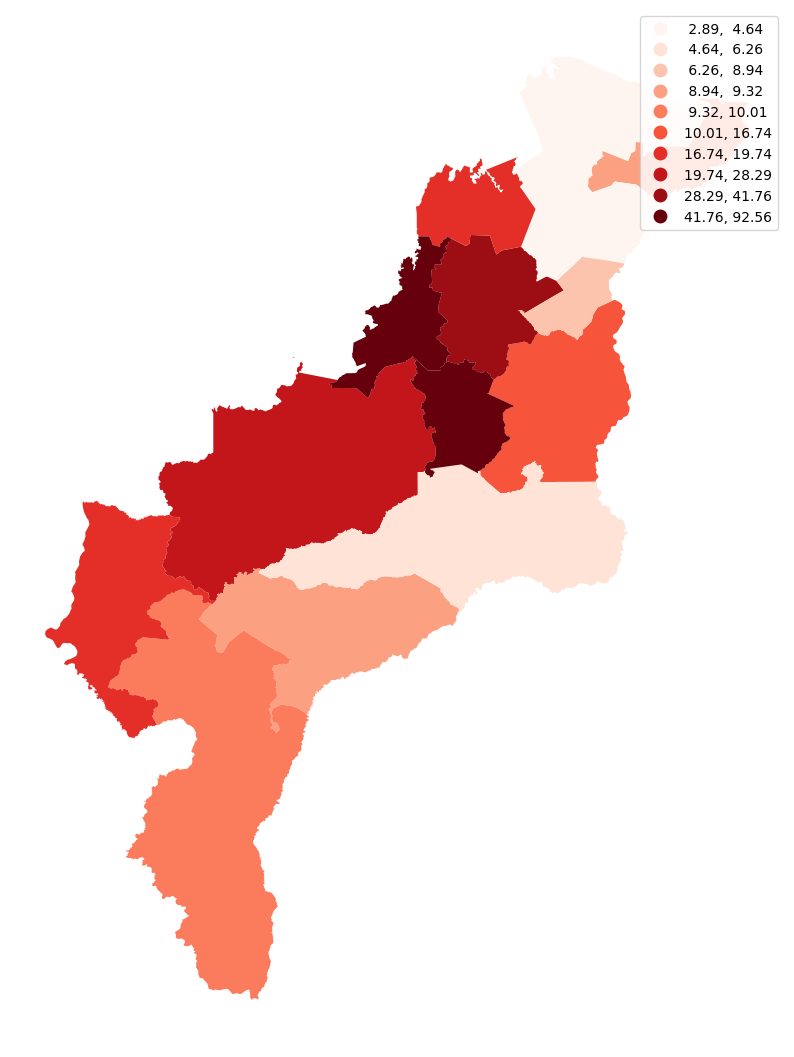

In [16]:
ax = df_micro_desmatamento.plot(
    column="d2000",  # Data to plot
    scheme="quantiles",  # Classification scheme
    k=10,
    cmap="Reds",  # Color palette
    legend=True,  # Add legend
    #legend_kwds={"fmt": "{:.0f}"},  # Remove decimals in legend
    figsize=(10,100)
)
ax.set_axis_off()

In [17]:
import folium

In [18]:
mapa = folium.Map(location = [-4.4671541,-43.9278995,],
                      zoom_start = 7,
                      tiles = 'OpenStreetMap')

folium.Choropleth(geo_data = df_micro_desmatamento,
                  data= df_micro_desmatamento,
                  columns = ['NM_MICRO','d01-23'],
                  key_on = 'feature.properties.NM_MICRO',
                  fill_color = 'Blues',
                  nan_fill_color = 'white',
                  bins = 10,
                  highlight = True,
                  legend_name = 'Porcentagem de Desmatamento').add_to(mapa)

# Adicionando controle de camadas
#folium.LayerControl().add_to(mapa)


mapa

In [19]:
df_micro_desmatamento.head()

inserted_a       area_ha      category_n  porc_cerra source  \
CD_MICRO                                                                
21011     2020-02-07  1.984568e+08  Bioma Refinado    0.915295   IBGE   
21013     2020-02-07  1.984568e+08  Bioma Refinado    1.000845   IBGE   
21017     2020-02-07  1.984568e+08  Bioma Refinado    1.000009   IBGE   
21021     2020-02-07  1.984568e+08  Bioma Refinado    0.999321   IBGE   
21018     2020-02-07  1.984568e+08  Bioma Refinado    0.999590   IBGE   

          version    area_cerra                    NM_MICRO  updated_at  \
CD_MICRO                                                                  
21011           1  33700.677928        Alto Mearim e Grajaú  2020-02-07   
21013           1   6039.736701   Baixo Parnaíba Maranhense  2020-02-07   
21017           1  15340.102814                      Caxias  2020-02-07   
21021           1  16961.316708    Chapadas das Mangabeiras  2020-02-07   
21018           1  25011.300477  Chapadas do Alto Itapecuru  2020-02-07   

           AREA_KM2 SIGLA_UF     d01-23     name      d2000     id  \
CD_MICRO                                                             
21011     36819.486       MA  23.178312  CERRADO  22.969564  18415   
21013      6034.638       MA  25.398299  CERRADO   9.184563  18415   
21017     15339.961       MA  32.163859  CERRADO  10.382197  18415   
21021     16972.844       MA  21.123042  CERRADO   9.242601  18415   
21018     25021.559       MA  18.649766  CERRADO   5.558591  18415   

               category                                           geometry  \
CD_MICRO                                                                     
21011     refined_biome  MULTIPOLYGON (((-46.79478 -5.87322, -46.79471 ...   
21013     refined_biome  POLYGON ((-43.16301 -3.43314, -43.16300 -3.432...   
21017     refined_biome  POLYGON ((-44.07660 -5.83684, -44.07614 -5.836...   
21021     refined_biome  POLYGON ((-46.45104 -7.06645, -46.41764 -7.017...   
21018     refined_biome  POLYGON ((-45.94808 -6.67402, -45.94770 -6.673...   

             d00-23  
CD_MICRO             
21011     46.147876  
21013     34.582862  
21017     42.546056  
21021     30.365642  
21018     24.208357

<Axes: >

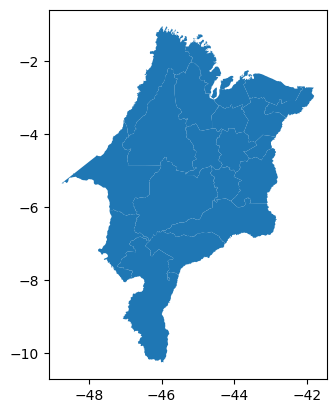

In [20]:
df_micro.plot()

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

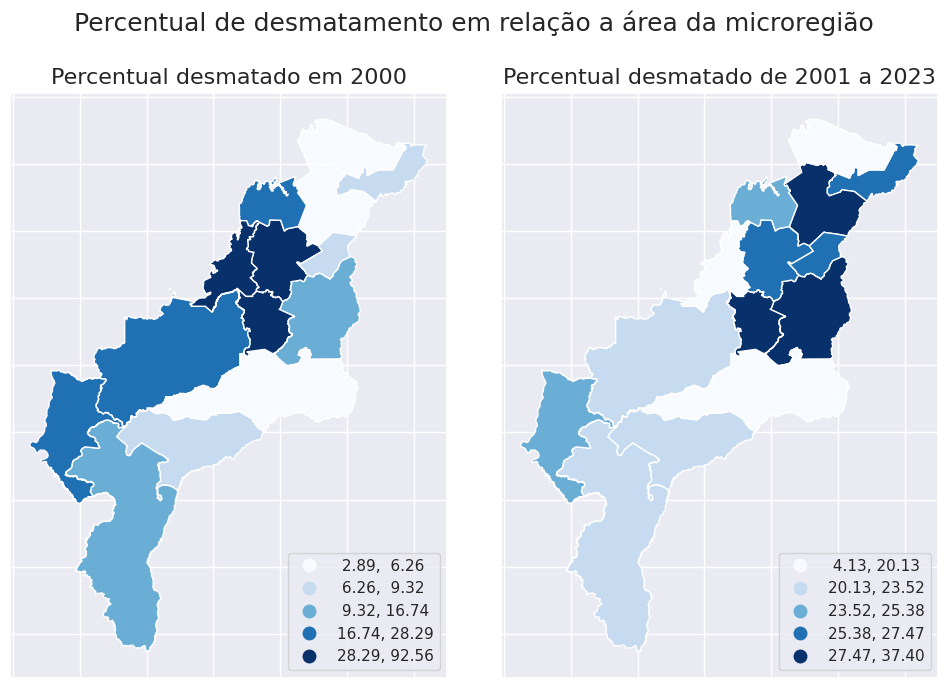

In [22]:
sns.set_theme(style="darkgrid")  # Estilo do gráfico


fig, axs = plt.subplots(1, 2, figsize=(10, 7))



ax1 = df_micro_desmatamento.plot(
    ax = axs[0],
    column="d2000",  # Data to plot
    scheme="quantiles",  # Classification scheme
    k=5,
    cmap="Blues",  # Color palette
    legend=True,  # Add legend
    #legend_kwds={"fmt": "{:.0f}"},  # Remove decimals in legend
    figsize=(10,100)
)


ax1.set_title('Percentual desmatado em 2000', fontsize=16)

# Customizar a legenda para posicioná-la no canto inferior direito
leg = ax1.get_legend()
leg.set_bbox_to_anchor((1, 0))
leg._loc = 4  # loc=4 corresponde ao canto inferior direito


# Desativar os rótulos do eixo x
ax1.tick_params(axis='x', labelbottom=False)
ax1.tick_params( axis='y', labelleft=False)


ax2 = df_micro_desmatamento.plot(
    ax = axs[1],
    column="d01-23",  # Data to plot
    scheme="quantiles",  # Classification scheme
    k=5,
    cmap="Blues",  # Color palette
    legend=True,  # Add legend
    #legend_kwds={"fmt": "{:.0f}"},  # Remove decimals in legend
    figsize=(10,100)
)
#ax2.set_axis_off()

ax2.set_title('Percentual desmatado de 2001 a 2023', fontsize=16)

# Customizar a legenda para posicioná-la no canto inferior direito
leg = ax2.get_legend()
leg.set_bbox_to_anchor((1, 0))
leg._loc = 4  # loc=4 corresponde ao canto inferior direito


# Desativar os rótulos do eixo x
ax2.tick_params(axis='x', labelbottom=False)
ax2.tick_params( axis='y', labelleft=False)
# Adicionar um título global e ajustar a posição vertical
fig.suptitle('Percentual de desmatamento em relação a área da microregião', fontsize=18)

# Ajustar layout
plt.tight_layout(rect=[0, 0, 1, 0.95])

In [23]:
df_micro_desmatamento.to_file("temp/desmatamento_microregioes_cerrado.shp")